# Projeto 3: modelo de Lorenz

texto

$$ \dot{x} = - \sigma x + \sigma y $$
$$ \dot{y} = rx - y - xz $$
$$ \dot{z} = -bz + xy $$

texto

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

In [3]:
def modelo_lorenz(xyz, t, r, σ=10, b=8/3):
    x,y,z = xyz
    u = -σ*x + σ*y
    v = r*x - y - x*z
    w = -b*z + x*y
    return [u, v, w]


# Condições iniciais padrão
inicial_padrao = np.array([0, 1, 0])

# r: parâmetro da equação de Lorenz
# inicial: valores iniciais de x,y,z
# Δt, t0, tf: intervalo de tempo, tempo inicial e tempo final
# params: parâmetros adicionais (σ e b)
def integra_lorenz(r, inicial=inicial_padrao, Δt=0.0025, t0=0, tf=40, *params):
    t = np.arange(t0, tf+Δt, Δt)
    args = (r,) + params
    sol = odeint(modelo_lorenz, inicial, t, args)
    x, y, z = sol.T
    return np.vstack((x, y, z, t))

## Problema 1

In [5]:
# Calcula as soluções nas condições iniciais padrão
# para t indo de 0 até 40, r na lista abaixo:
valores_r = [1, 7, 15, 20, 35, 50]
solucoes_dic = {}
for r in valores_r:
    sol = integra_lorenz(r)
    solucoes_dic[r] = sol

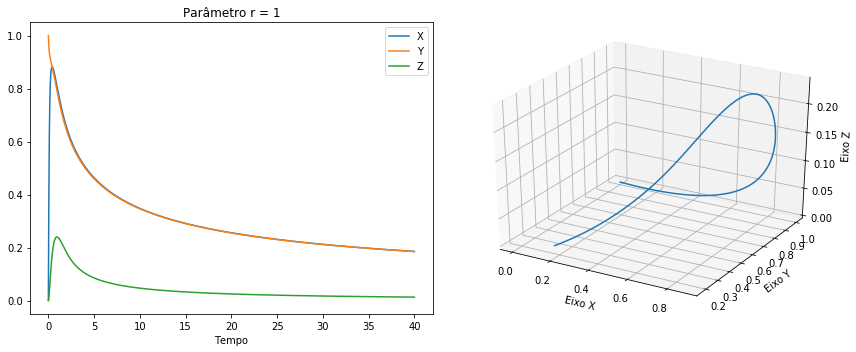

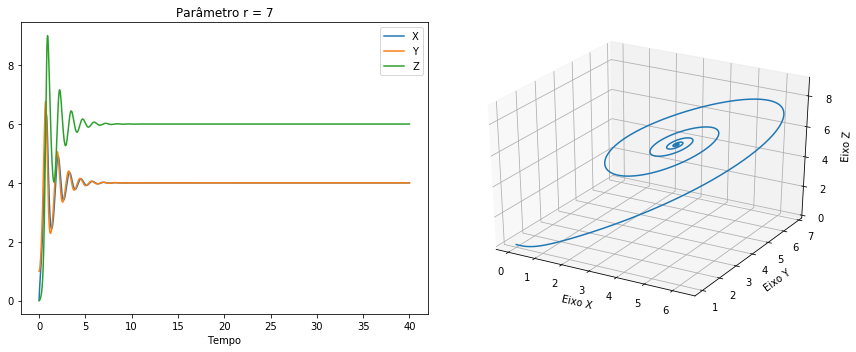

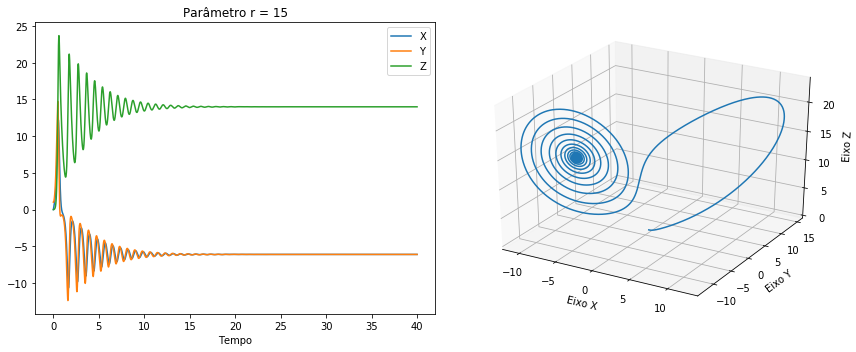

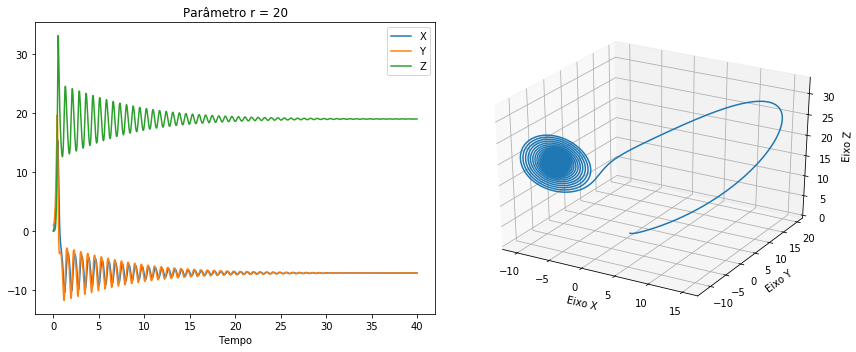

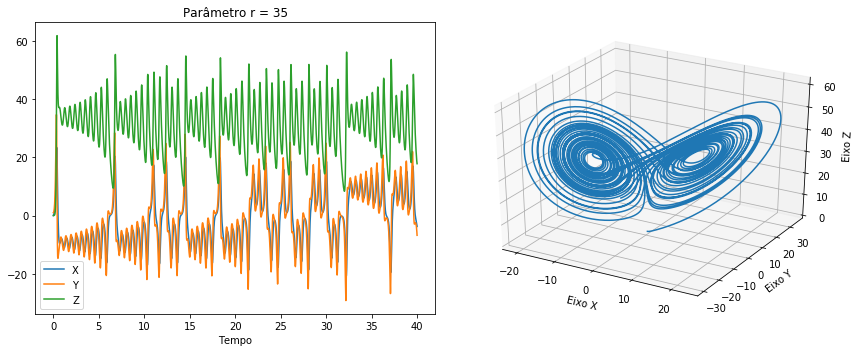

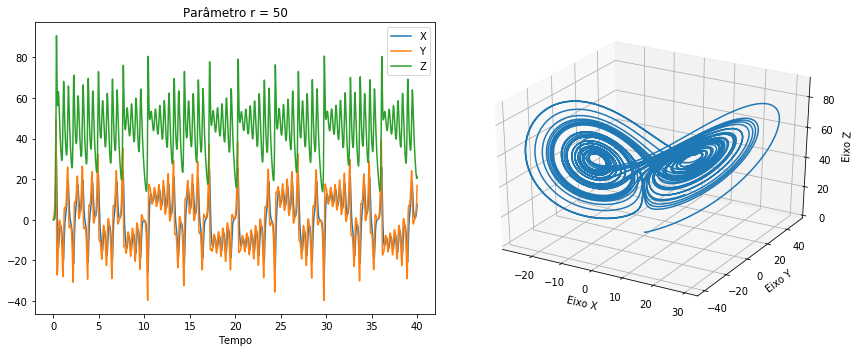

In [20]:
for r, sol in solucoes_dic.items():
    x, y, z, t = sol

    fig = plt.figure(figsize=(12,5))
    
    ax1 = fig.add_subplot(121)
    ax1.plot(t, x, label='X')
    ax1.plot(t, y, label='Y')
    ax1.plot(t, z, label='Z')
    ax1.set_xlabel('Tempo')
    ax1.legend()
    
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot(x, y, z)
    ax2.set_xlabel('Eixo X')
    ax2.set_ylabel('Eixo Y')
    ax2.set_zlabel('Eixo Z')
    
    ax1.set_title('Parâmetro r = {}'.format(r))
    fig.tight_layout()
    fig.show()

COMENTAR AQUI SOBRE TRANSIENTES E DIFERENÇAS QUALITATIVAS ENTRE AS TRAJETÓRIAS